In [9]:
with open('api_key.txt', 'r') as f:
    api_key = f.read()

In [10]:
print(api_key)

esta es una api key


In [8]:
print(f)

<_io.TextIOWrapper name='api_key.txt' mode='r' encoding='cp1252'>


#1) Realizar la lectura de datos de los archivos propuestos

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/train.csv',sep=',')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2) Llevar a cabo un análisis exploratorio de datos (EDA) con su correspondiente interpretación

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
pd.set_option('display.max_rows', None)  # or 1000
serie=(train.isnull().sum()/train.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [ ]:
# Grafico top 10 propiedades más caras
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

train_ordenada = train.sort_values(by='SalePrice', ascending=False)

fig,ax = plt.subplots(figsize=(12,6))
sns.barplot(data=train_ordenada.head(10), x='Id', y='SalePrice')
plt.xlabel('Ids propiedades')
plt.ylabel('Precios')
plt.title('Top Precios')

#3) En caso de ser necesario desarrollar el proceso de Data Wrangling

In [ ]:
col_del=['PoolQC','MiscFeature','Alley','Fence','Id'] # Columnas a borrar que no aportan
col_inter= ['LotFrontage','GarageYrBlt','MasVnrArea'] # Columnas a interpolar
col_cat= ['FireplaceQu','GarageFinish','GarageCond','GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond',
          'BsmtQual','MasVnrType','Electrical'] # Columnas cateogoricas

In [ ]:
train_x=train.drop(labels=col_del, axis=1)
train_x.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [ ]:
for i in col_inter:
  train_x[i] = train_x[i].fillna(train_x[i].median())

In [ ]:
train_x.MasVnrArea.isnull().sum()

0

In [ ]:
for i in col_cat:
  train_x[i] = train_x[i].fillna('Nsnc')

In [ ]:
train_x.SaleCondition.value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [ ]:

train_x.duplicated().sum()


0

In [ ]:
# prompt: Realiza un standard scaller en todas las columnas menos las categorical_columns

from sklearn.preprocessing import StandardScaler

categorical_columns = ['FireplaceQu', 'GarageFinish', 'GarageCond', 'GarageType', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']

numerical_columns = train_x.columns.difference(categorical_columns)

scaler = StandardScaler()
train_x[numerical_columns] = scaler.fit_transform(train_x[numerical_columns])

train_x.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.725807,0.092295,-0.233570,-0.205885,0.570704,-0.525499,0.992930,0.823953,0.462009,0.571581,...,-0.059842,-0.339739,-0.029881,0.419864,-0.260037,-0.029881,-0.089964,-0.127746,0.491343,-0.344619
1,-1.723429,-0.865696,0.384834,-0.064358,-0.153825,2.284122,0.120665,-0.460746,-0.572748,1.152559,...,-0.059842,-0.339739,-0.029881,0.419864,-0.260037,-0.029881,-0.089964,-0.127746,0.491343,-0.344619
2,-1.721052,0.092295,-0.109889,0.138702,0.570704,-0.525499,0.928317,0.776371,0.282510,0.101672,...,-0.059842,-0.339739,-0.029881,0.419864,-0.260037,-0.029881,-0.089964,-0.127746,0.491343,-0.344619
3,-1.718674,0.331793,-0.439705,-0.070512,0.570704,-0.525499,-1.850006,-0.746235,-0.572748,-0.475034,...,-0.059842,-0.339739,-0.029881,0.419864,3.845612,-0.029881,-0.089964,-0.127746,-2.035240,-0.344619
4,-1.716296,0.092295,0.549742,0.509132,1.295234,-0.525499,0.896011,0.681208,1.275032,0.462647,...,-0.059842,-0.339739,-0.029881,0.419864,-0.260037,-0.029881,-0.089964,-0.127746,0.491343,-0.344619


In [ ]:

# Obtener las columnas de tipo cadena (strings) con 5 o menos valores únicos
categorical_columns = train_x.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if train_x[col].nunique() <= 5]

# Aplicar la codificación one-hot a las columnas categóricas seleccionadas
train_encoded = pd.get_dummies(train_x, columns=categorical_columns)

# Ver los primeros registros del DataFrame resultante
print(train_encoded.head())

# Obtener las columnas de tipo cadena (strings) con 5 o menos valores únicos
categorical_columns = train_x.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if train_x[col].nunique() <= 5]

# Filtrar las columnas restantes de tipo cadena (strings)
remaining_categorical_columns = [col for col in train_x.columns if col not in categorical_columns]

# Aplicar la codificación one-hot a las columnas categóricas seleccionadas
train_encoded = pd.get_dummies(train_x, columns=categorical_columns)

# Eliminar las columnas restantes de tipo cadena (strings)
train_encoded.drop(columns=remaining_categorical_columns, inplace=True)

# Ver los primeros registros del DataFrame resultante
print(train_encoded.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003       196.0         706  ...           False         False   
1          1976         0.0         978  ...           False         False   
2          2002       162.0         486  ...           False         False   
3          1970         0.0         216  ...           False         False   
4          2000       350.0         655  ...           False         False   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorm

In [ ]:


train_x.dropna(inplace=True)


#4) Desarrollar al menos 3 algoritmos de regresión para resolver el desafío

In [ ]:



from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = train_x.drop('SalePrice', axis=1)
y = train_x['SalePrice']

model = linear_model.LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print("RMSE:", rmse)
print("R2:", r2)
print("MAE:", mae)


RMSE: 0.25002705459212365
R2: 0.9374864719719872
MAE: 0.15612716191911877


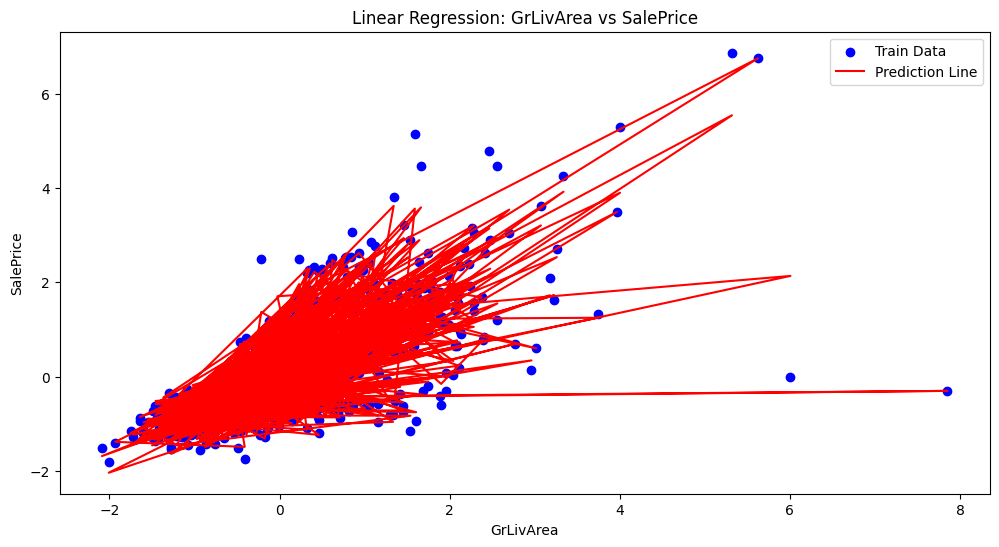

In [ ]:
# prompt: Grafica la linea de prediccion y el train test

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X['GrLivArea'], y, color='blue', label='Train Data')
ax.plot(X['GrLivArea'], y_pred, color='red', label='Prediction Line')

ax.set_xlabel('GrLivArea')
ax.set_ylabel('SalePrice')
ax.set_title('Linear Regression: GrLivArea vs SalePrice')
ax.legend()

plt.show()


#5) Calcular métricas como RMSE, R2, MAE para cada modelo

In [ ]:


import numpy as np
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

y_pred = model.predict(X)

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print("RMSE:", rmse)
print("R2:", r2)
print("MAE:", mae)


RMSE: 0.14559832683389715
R2: 0.9788011272231697
MAE: 0.08345167908229546


In [ ]:
# prompt: Haz un modelo de ADABoost sobre SalePrice y calcula rmse r2 y mae

import numpy as np
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

y_pred = model.predict(X)

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print("RMSE:", rmse)
print("R2:", r2)
print("MAE:", mae)


RMSE: 0.34191325012328083
R2: 0.8830953293901348
MAE: 0.26704485710200604


KeyError: '1Fam'